In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt
from sklearn.cluster import DBSCAN
import warnings 
warnings.filterwarnings('ignore')

df = pd.read_json('livedata.json')

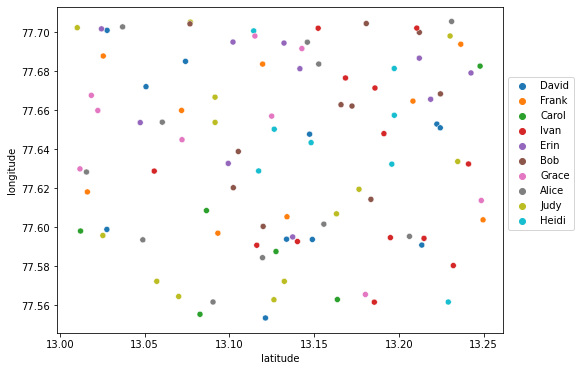

In [2]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='latitude', y='longitude', data=df, hue='id')
plt.legend(bbox_to_anchor=[1, 0.8])
plt.show()

In [ ]:
model = DBSCAN(eps=0.008, min_samples=2, metric='haversine').fit(df[['latitude', 'longitude']])
labels = model.labels_
fig = plt.figure(figsize=(8,6))
sns.scatterplot(df['latitude'], df['longitude'], hue = ['cluster {}'.format(x) for x in labels])
plt.legend(bbox_to_anchor = [1, 1])
plt.show()

In [ ]:
def get_infected_names():   
    infected_name = input()
    while (infected_name not in df['id'].tolist()):
        print('No name found! Please do again!')
        infected_name = input()
    
    df['cluster'] = model.labels_.tolist()
    infected_name_clusters = [] 
    for i in range(len(df)):
        if df['id'][i] == infected_name:
            if df['cluster'][i] in infected_name_clusters:
                pass
            else:
                infected_name_clusters.append(df['cluster'][i])
                
    infected_list = []
    for cluster in infected_name_clusters:
        if cluster != -1:
            ids_in_cluster = df.loc[df['cluster'] == cluster, 'id']
            for i in range (len(ids_in_cluster)):
                member_id = ids_in_cluster.iloc[i]
                if (member_id not in infected_list) and (member_id != infected_name):
                    infected_list.append(member_id)
                else:
                    pass
                
    return infected_list

In [ ]:
get_infected_names()